In [21]:
import numpy as np 
import pandas as pd 
import seaborn as sb 
import matplotlib.pyplot as plt
sb.set_style('whitegrid')
%matplotlib inline 

In [3]:
data=pd.read_csv("911.csv")

In [4]:
data.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [6]:
data['title'].nunique()

110

In [7]:
data['title']

0             EMS: BACK PAINS/INJURY
1            EMS: DIABETIC EMERGENCY
2                Fire: GAS-ODOR/LEAK
3             EMS: CARDIAC EMERGENCY
4                     EMS: DIZZINESS
                    ...             
99487    Traffic: VEHICLE ACCIDENT -
99488    Traffic: VEHICLE ACCIDENT -
99489               EMS: FALL VICTIM
99490           EMS: NAUSEA/VOMITING
99491    Traffic: VEHICLE ACCIDENT -
Name: title, Length: 99492, dtype: object

In [8]:
data['Reason'] = data['title'].apply(lambda title: title.split(':')[0])

In [9]:
data['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

<AxesSubplot:xlabel='Reason', ylabel='count'>

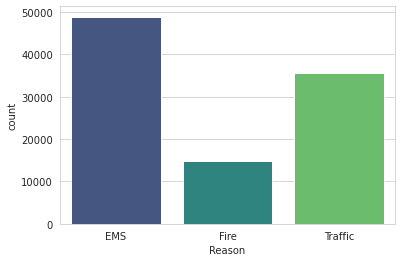

In [10]:
sb.countplot(x='Reason',data=data,palette='viridis')

In [11]:
type(data['timeStamp'].iloc[0])


str

In [12]:
data['timeStamp'] = pd.to_datetime(data['timeStamp'])

In [13]:
data['timeStamp']

0       2015-12-10 17:40:00
1       2015-12-10 17:40:00
2       2015-12-10 17:40:00
3       2015-12-10 17:40:01
4       2015-12-10 17:40:01
                ...        
99487   2016-08-24 11:06:00
99488   2016-08-24 11:07:02
99489   2016-08-24 11:12:00
99490   2016-08-24 11:17:01
99491   2016-08-24 11:17:02
Name: timeStamp, Length: 99492, dtype: datetime64[ns]

In [14]:
data['Hour'] = data['timeStamp'].apply(lambda time: time.hour)
data['Month'] = data['timeStamp'].apply(lambda time: time.month)
data['Day of Week'] = data['timeStamp'].apply(lambda time: time.dayofweek)

In [15]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [16]:
data['Day of Week'] = data['Day of Week'].map(dmap)

In [17]:
data['Day of Week']

0        Thu
1        Thu
2        Thu
3        Thu
4        Thu
        ... 
99487    Wed
99488    Wed
99489    Wed
99490    Wed
99491    Wed
Name: Day of Week, Length: 99492, dtype: object

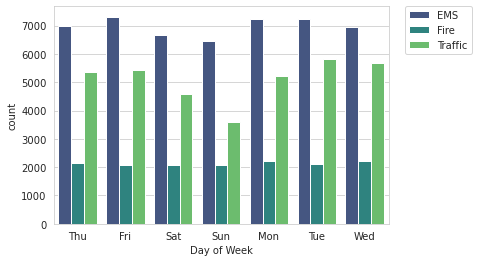

In [22]:
sb.countplot(x='Day of Week',data=data,hue='Reason',palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

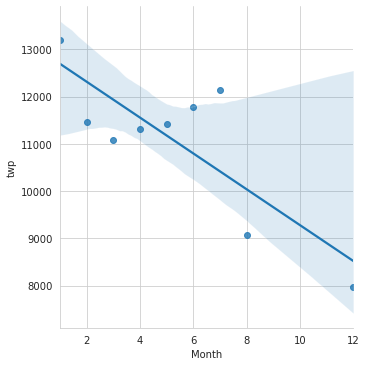

In [25]:
byMonth = data.groupby('Month').count()
sb.lmplot(x='Month',y='twp',data=byMonth.reset_index())

<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

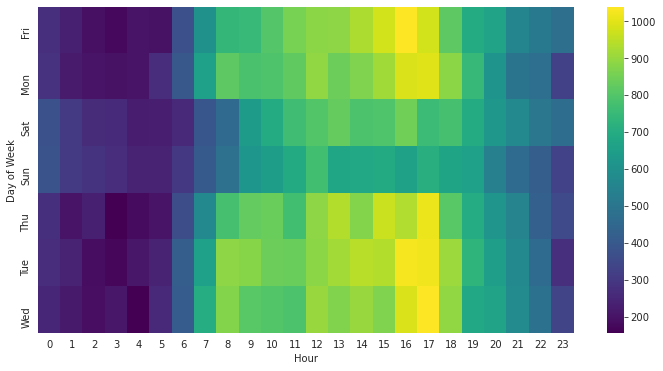

In [27]:
dayHour = data.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
plt.figure(figsize=(12,6))
sb.heatmap(dayHour,cmap='viridis')

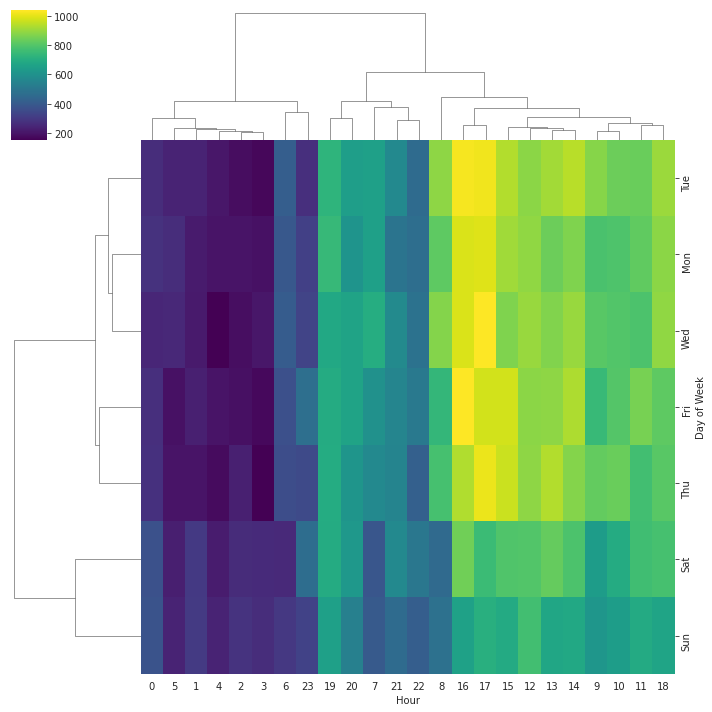

In [28]:
sb.clustermap(dayHour,cmap='viridis')